In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
#read in 3 datasets for Pfizer, Moderna, and Janssen
Pfizer = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv")
Moderna = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv")
Janssen = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv")

In [66]:
Pfizer

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,04/05/2021,50310,50310
1,Maine,04/05/2021,19890,19890
2,Massachusetts,04/05/2021,95940,95940
3,New Hampshire,04/05/2021,19890,19890
4,Rhode Island,04/05/2021,15210,15210
...,...,...,...,...
1066,Virginia,12/14/2020,72150,72150
1067,Washington,12/14/2020,62400,62400
1068,West Virginia,12/14/2020,16575,16575
1069,Wisconsin,12/14/2020,49725,49725


In [67]:
Moderna

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,04/05/2021,37400,37400
1,Maine,04/05/2021,14300,14300
2,Massachusetts,04/05/2021,72100,72100
3,New Hampshire,04/05/2021,14300,14300
4,Rhode Island,04/05/2021,11300,11300
...,...,...,...,...
1003,Virginia,12/21/2020,146400,146400
1004,Washington,12/21/2020,128000,128000
1005,West Virginia,12/21/2020,32600,32600
1006,Wisconsin,12/21/2020,101000,101000


In [68]:
Janssen

,Jurisdiction,Week of Allocations,1st Dose Allocations
0,Connecticut,04/05/2021,53900
1,Maine,04/05/2021,20600
2,Massachusetts,04/05/2021,103800
3,New Hampshire,04/05/2021,20600
4,Rhode Island,04/05/2021,16200
...,...,...,...
310,Alaska,03/01/2021,8900
311,Idaho,03/01/2021,13300
312,Oregon,03/01/2021,34400
313,Washington,03/01/2021,60900


In [69]:
# merge the three datasets and rename columns for readability
merged = Pfizer.merge(Moderna, how='outer', on=['Jurisdiction','Week of Allocations'])
merged = merged.merge(Janssen, how='outer', on=['Jurisdiction','Week of Allocations'])

columns = ['Jurisdiction','Week','Pfizer 1st Dose','Pfizer 2nd Dose','Moderna 1st Dose','Moderna 2nd Dose','Janssen Dose']
merged.columns = columns
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,04/05/2021,50310,50310,37400.0,37400.0,53900.0
1,Maine,04/05/2021,19890,19890,14300.0,14300.0,20600.0
2,Massachusetts,04/05/2021,95940,95940,72100.0,72100.0,103800.0
3,New Hampshire,04/05/2021,19890,19890,14300.0,14300.0,20600.0
4,Rhode Island,04/05/2021,15210,15210,11300.0,11300.0,16200.0
...,...,...,...,...,...,...,...
1066,Virginia,12/14/2020,72150,72150,NaN,NaN,NaN
1067,Washington,12/14/2020,62400,62400,NaN,NaN,NaN
1068,West Virginia,12/14/2020,16575,16575,NaN,NaN,NaN
1069,Wisconsin,12/14/2020,49725,49725,NaN,NaN,NaN


In [70]:
# replace NaN values to 0 for now to represent no doses for that period
merged.fillna(0)

# change week column to something more sort friendly
merged['Week'] = pd.to_datetime(merged.Week)
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,2021-04-05,50310,50310,37400.0,37400.0,53900.0
1,Maine,2021-04-05,19890,19890,14300.0,14300.0,20600.0
2,Massachusetts,2021-04-05,95940,95940,72100.0,72100.0,103800.0
3,New Hampshire,2021-04-05,19890,19890,14300.0,14300.0,20600.0
4,Rhode Island,2021-04-05,15210,15210,11300.0,11300.0,16200.0
...,...,...,...,...,...,...,...
1066,Virginia,2020-12-14,72150,72150,NaN,NaN,NaN
1067,Washington,2020-12-14,62400,62400,NaN,NaN,NaN
1068,West Virginia,2020-12-14,16575,16575,NaN,NaN,NaN
1069,Wisconsin,2020-12-14,49725,49725,NaN,NaN,NaN


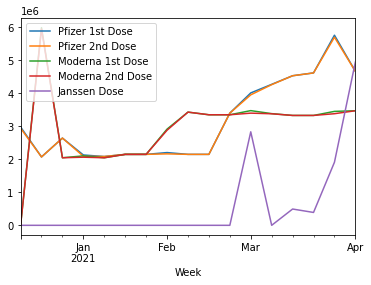

In [73]:
# quick and simple EDA to look at number of doses over times
merged.groupby('Week').sum().plot();